In [3]:
import pandas as pd
import portfolio_utils as pfu
import json

<Axes: title={'center': '@TheCryptoLark portfolio value over time (CASH as neutral asset)'}, xlabel='date'>

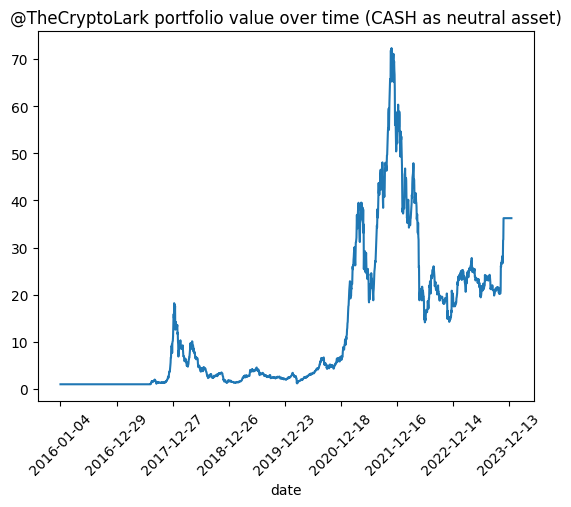

In [38]:
# check @TheCryptoLark (extreme outlier)

run_path = "../data/portfolios/raw/equal_weight_cash_hp252_wait1_pos99999"
channel_id = "@TheCryptoLark"

# load portfolio data
pos_df_at = pd.read_csv(f"{run_path}/{channel_id}_pos_at.csv", sep=";", index_col=0)
pos_df_bt = pd.read_csv(f"{run_path}/{channel_id}_pos_bt.csv", sep=";", index_col=0)
trade_logs_df = pd.read_csv(f"{run_path}/{channel_id}_trade_logs.csv", sep=";")

# instantiate portfolio object
pf = pfu.Portfolio(pos_df_bt, pos_df_at, trade_logs_df, compute_settings=None, channel_id=channel_id)
pf.pf_values.plot(title=f"{channel_id} portfolio value over time (CASH as neutral asset)", rot=45)

<Axes: title={'center': '@TheCryptoLark portfolio value over time (CASH as neutral asset)'}, xlabel='date'>

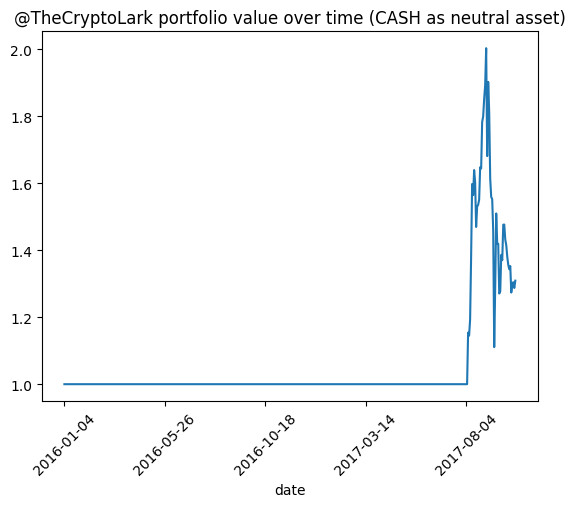

In [43]:
# plot only first 450 days
pf.pf_values[:450].plot(title=f"{channel_id} portfolio value over time (CASH as neutral asset)", rot=45)

<Axes: title={'center': '@TheCryptoLark portfolio value over time (SPY as neutral asset)'}, xlabel='date'>

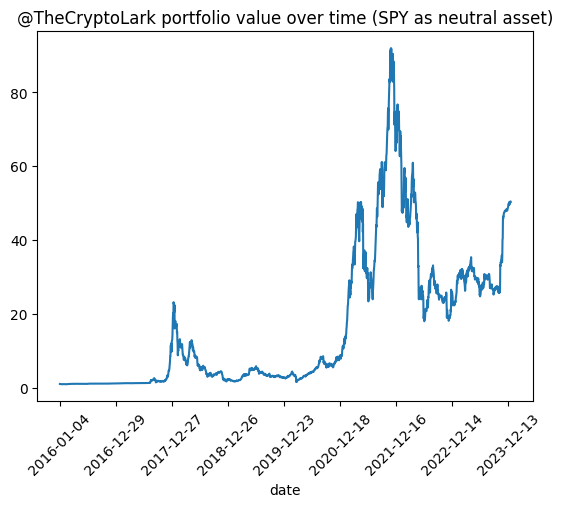

In [44]:
# check @TheCryptoLark

run_path = "../data/portfolios/raw/equal_weight_SPY_hp252_wait1_pos99999"
channel_id = "@TheCryptoLark"

# load portfolio data
pos_df_at = pd.read_csv(f"{run_path}/{channel_id}_pos_at.csv", sep=";", index_col=0)
pos_df_bt = pd.read_csv(f"{run_path}/{channel_id}_pos_bt.csv", sep=";", index_col=0)
trade_logs_df = pd.read_csv(f"{run_path}/{channel_id}_trade_logs.csv", sep=";")

# instantiate portfolio object
pf = pfu.Portfolio(pos_df_bt, pos_df_at, trade_logs_df, compute_settings=None, channel_id=channel_id)
pf.pf_values.plot(title=f"{channel_id} portfolio value over time (SPY as neutral asset)", rot=45)

<Axes: title={'center': '@TheCryptoLark portfolio value over time (CASH as neutral asset)'}, xlabel='date'>

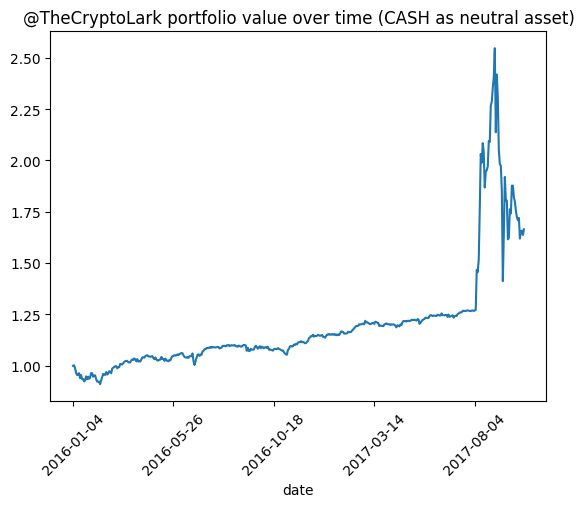

In [45]:
# plot only first 450 days
pf.pf_values[:450].plot(title=f"{channel_id} portfolio value over time (CASH as neutral asset)", rot=45)

Portfolio for channel_id @ToriTrades: No trades executed.


<Axes: title={'center': '@ToriTrades portfolio value over time'}, xlabel='date'>

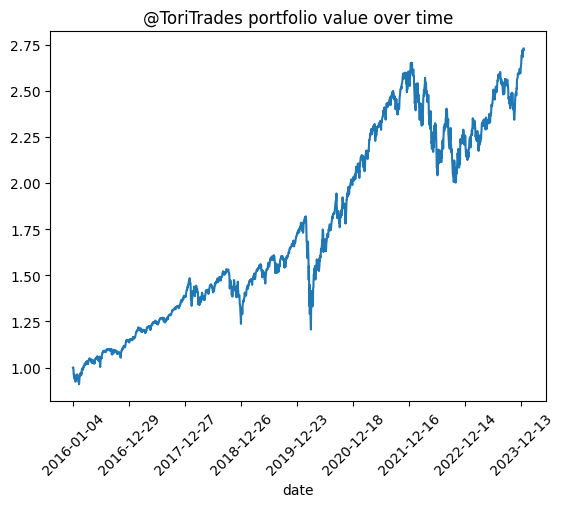

In [21]:
# check @ToriTrades (no trades)
run_path = "../data/portfolios/raw/equal_weight_SPY_hp252_wait1_pos99999"
channel_id = "@ToriTrades"

# load portfolio data
pos_df_at = pd.read_csv(f"{run_path}/{channel_id}_pos_at.csv", sep=";", index_col=0)
pos_df_bt = pd.read_csv(f"{run_path}/{channel_id}_pos_bt.csv", sep=";", index_col=0)
trade_logs_df = pd.read_csv(f"{run_path}/{channel_id}_trade_logs.csv", sep=";")

# instantiate portfolio object
pf = pfu.Portfolio(pos_df_bt, pos_df_at, trade_logs_df, compute_settings=None, channel_id=channel_id)
pf_values = pos_df_at.sum(axis=1)
pf_values.plot(title=f"{channel_id} portfolio value over time (SPY as neutral asset)", rot=45)

### Preliminary Exploration of Results

Portfolio for channel_id @belangp: No trades executed.
Portfolio for channel_id @ToriTrades: No trades executed.


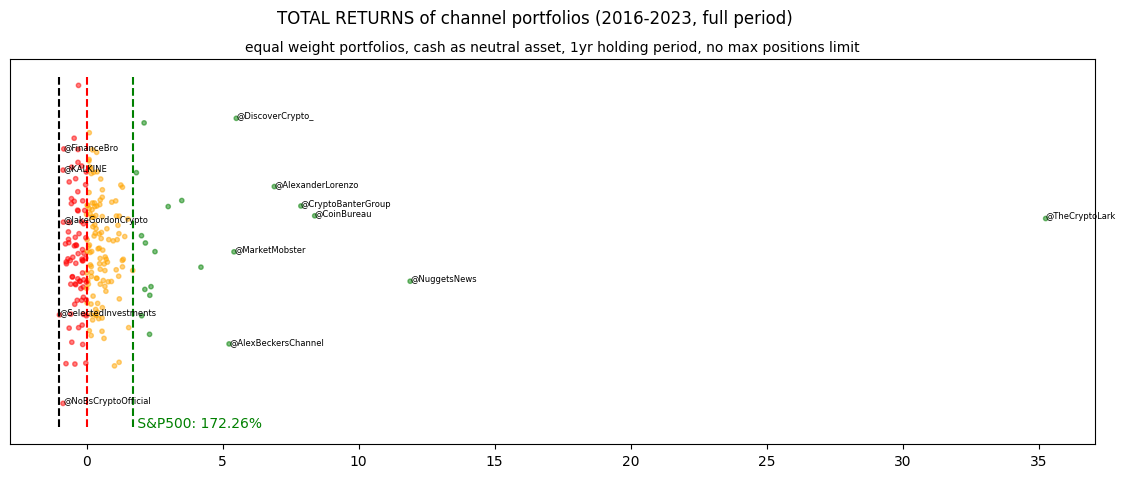

Share of portfolios beating SPY in total return: 9.95%


'\n# plot sharpe ratios\nfig, ax = plt.subplots()\ny = np.random.normal(0, 0.3, len(sharpes_active_period))\ncolors = ["red" if sh < 0 else "orange" if sh < spy_sharpe else "green" for sh in sharpes_active_period]\nax.scatter(sharpes_active_period, y, alpha=0.5, s=10, c=colors)\nax.set_yticklabels([])\nax.set_yticks([])\nax.vlines(0, -1, 1, color="black", linestyle="--")\nax.vlines(spy_sharpe, -1, 1, color="green", linestyle="--")\n# label tbills line\nax.annotate(" 3m-Tbills", (0, -1), color="black", fontsize=10)\n# label spy line\nax.annotate(" S&P500 (2016-2023)", (spy_sharpe, -1), color="green", fontsize=10)\n# label outliers with channel names\nfor i, txt in enumerate(names):\n    if sharpes_active_period[i] < -0.05 or sharpes_active_period[i] > 0.075:\n        ax.annotate(txt, (sharpes_active_period[i], y[i]), fontsize=6)\nplt.suptitle("SHARPE RATIOS based on daily returns of channel portfolios (computed for active period only)")\nplt.title(f"computed with daily return frequency,

In [ ]:

# load single run data
save_dir = "../data/portfolios/raw"
run_name = "equal_weight_cash_hp252_wait1_pos99999"

channel_ids = pd.read_csv(f"{save_dir}/channel_ids.csv", sep=";")["channel_ids"].values
compute_settings = json.load(open(f"{save_dir}/{run_name}/settings.json", "r"))
portfolios = []
for channel_id in channel_ids:
    pos_df_bt = pd.read_csv(f"{save_dir}/{run_name}/{channel_id}_pos_bt.csv", sep=";", index_col=0)
    pos_df_at = pd.read_csv(f"{save_dir}/{run_name}/{channel_id}_pos_at.csv", sep=";", index_col=0)
    trade_logs_df = pd.read_csv(f"{save_dir}/{run_name}/{channel_id}_trade_logs.csv", sep=";")
    
    # test loading into portfolio objects
    portfolios.append(pfu.Portfolio(channel_id=channel_id, 
                                    pos_df_bt=pos_df_bt, 
                                    pos_df_at=pos_df_at, 
                                    trade_logs_df=trade_logs_df, 
                                    compute_settings=compute_settings))

date_idx = portfolios[0].pos_df_bt.index

# load benchmark data
spy_returns = returns_df["benchmark+SPY"].loc[date_idx]
tbill_returns = returns_df["benchmark+3m_tbills"].loc[date_idx]
# benchmark total returns
spy_total_return = (spy_returns + 1).cumprod()
tbill_total_return = (tbill_returns + 1).cumprod()
# benchmark sharpe ratios
spy_sharpe = pfu.sharpe_ratio(pf_returns=spy_returns, rf_returns=tbill_returns)

# plot total returns for each portfolio (which has trades)
names, total_returns, total_returns_active_period, sharpes_active_period = [], [], [], []
for pf in portfolios:
    if pf.has_trades:
        names.append(pf.channel_id)
        total_returns.append(pf.get_total_return(active_period_only=False))
        total_returns_active_period.append(pf.get_total_return(active_period_only=True))
        sharpes_active_period.append(pf.get_sharpe_ratio(risk_free_returns=tbill_returns, active_period_only=True, ))

# get benchmark total return: SPY
spy_total_return = (returns_df["benchmark+SPY"].loc["2016-01-04":"2023-12-29"] + 1).prod() - 1

# jitter plot of returns on one axis, jittered (with names as labels)
import matplotlib.pyplot as plt
import numpy as np

# make plots wider
plt.rcParams['figure.figsize'] = [14, 5]


# plot total returns
fig, ax = plt.subplots()
y = np.random.normal(0, 0.3, len(total_returns))
# color red if < 0, yellow if between 0 and spy_total_return, green if > spy_total_return
colors = ["red" if tr < 0 else "orange" if tr < spy_total_return else "green" for tr in total_returns]
ax.scatter(total_returns, y, alpha=0.5, s=10, c=colors)
ax.set_yticklabels([])
ax.set_yticks([])
ax.vlines(-1, -1, 1, color="black", linestyle="--")
ax.vlines(0, -1, 1, color="red", linestyle="--")
ax.vlines(spy_total_return, -1, 1, color="green", linestyle="--")
# label spy return line
ax.annotate(f" S&P500: {spy_total_return*100:.2f}%", (spy_total_return, -1), color="green", fontsize=10)
# label outliers with channel names
for i, txt in enumerate(names):
    if total_returns[i] > 5 or total_returns[i] < -0.8:
        ax.annotate(txt, (total_returns[i], y[i]), fontsize=6)
plt.suptitle("TOTAL RETURNS of channel portfolios (2016-2023, full period)")
plt.title(f"equal weight portfolios, cash as neutral asset, 1yr holding period, no max positions limit", fontsize=10)
plt.show()

print(f"Share of portfolios beating SPY in total return: {sum([tr > spy_total_return for tr in total_returns])/len(total_returns)*100:.2f}%")
"""
# plot sharpe ratios
fig, ax = plt.subplots()
y = np.random.normal(0, 0.3, len(sharpes_active_period))
colors = ["red" if sh < 0 else "orange" if sh < spy_sharpe else "green" for sh in sharpes_active_period]
ax.scatter(sharpes_active_period, y, alpha=0.5, s=10, c=colors)
ax.set_yticklabels([])
ax.set_yticks([])
ax.vlines(0, -1, 1, color="black", linestyle="--")
ax.vlines(spy_sharpe, -1, 1, color="green", linestyle="--")
# label tbills line
ax.annotate(" 3m-Tbills", (0, -1), color="black", fontsize=10)
# label spy line
ax.annotate(" S&P500 (2016-2023)", (spy_sharpe, -1), color="green", fontsize=10)
# label outliers with channel names
for i, txt in enumerate(names):
    if sharpes_active_period[i] < -0.05 or sharpes_active_period[i] > 0.075:
        ax.annotate(txt, (sharpes_active_period[i], y[i]), fontsize=6)
plt.suptitle("SHARPE RATIOS based on daily returns of channel portfolios (computed for active period only)")
plt.title(f"computed with daily return frequency, US 3m-Tbills as risk-free asset", fontsize=10)
plt.show()
"""


Portfolio for channel_id @belangp: No trades executed.
Portfolio for channel_id @ToriTrades: No trades executed.


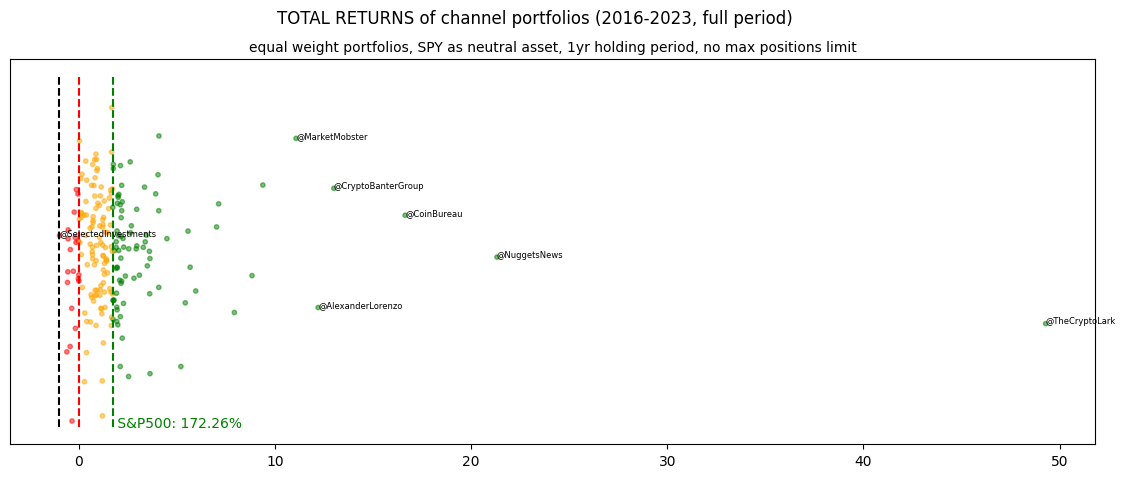

Share of portfolios beating SPY in total return: 39.81%


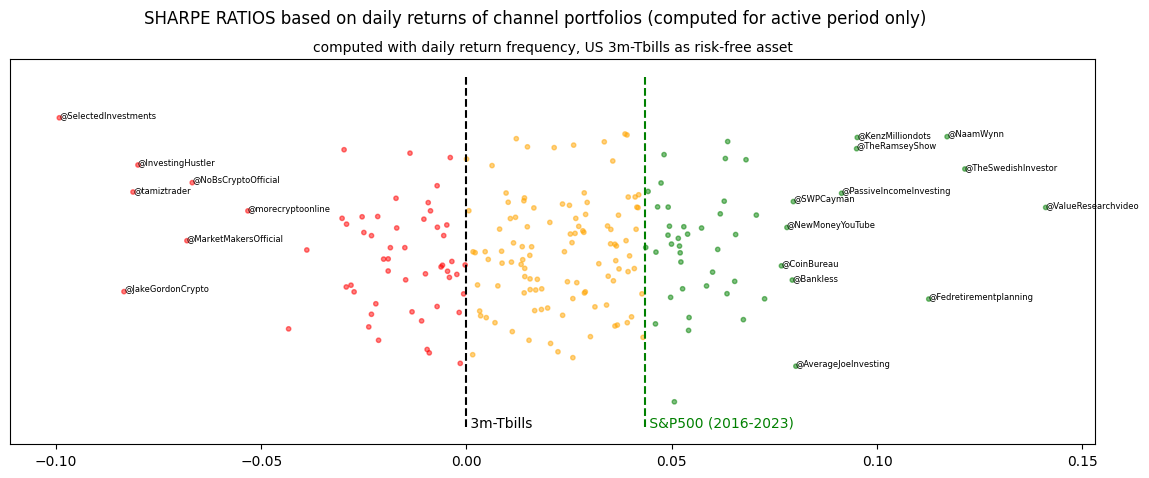

In [ ]:
# load single run data
save_dir = "../data/portfolios/raw"
run_name = "equal_weight_SPY_hp252_wait1_pos99999"

channel_ids = pd.read_csv(f"{save_dir}/channel_ids.csv", sep=";")["channel_ids"].values
compute_settings = json.load(open(f"{save_dir}/{run_name}/settings.json", "r"))
portfolios = []
for channel_id in channel_ids:
    pos_df_bt = pd.read_csv(f"{save_dir}/{run_name}/{channel_id}_pos_bt.csv", sep=";", index_col=0)
    pos_df_at = pd.read_csv(f"{save_dir}/{run_name}/{channel_id}_pos_at.csv", sep=";", index_col=0)
    trade_logs_df = pd.read_csv(f"{save_dir}/{run_name}/{channel_id}_trade_logs.csv", sep=";")
    
    # test loading into portfolio objects
    portfolios.append(pfu.Portfolio(channel_id=channel_id, 
                                    pos_df_bt=pos_df_bt, 
                                    pos_df_at=pos_df_at, 
                                    trade_logs_df=trade_logs_df, 
                                    compute_settings=compute_settings))

date_idx = portfolios[0].pos_df_bt.index

# load benchmark data
spy_returns = returns_df["benchmark+SPY"].loc[date_idx]
tbill_returns = returns_df["benchmark+3m_tbills"].loc[date_idx]
# benchmark total returns
spy_total_return = (spy_returns + 1).cumprod()
tbill_total_return = (tbill_returns + 1).cumprod()
# benchmark sharpe ratios
spy_sharpe = pfu.sharpe_ratio(pf_returns=spy_returns, rf_returns=tbill_returns)

# plot total returns for each portfolio (which has trades)
names, total_returns, total_returns_active_period, sharpes_active_period = [], [], [], []
for pf in portfolios:
    if pf.has_trades:
        names.append(pf.channel_id)
        total_returns.append(pf.get_total_return(active_period_only=False))
        total_returns_active_period.append(pf.get_total_return(active_period_only=True))
        sharpes_active_period.append(pf.get_sharpe_ratio(risk_free_returns=tbill_returns, active_period_only=True, ))

# get benchmark total return: SPY
spy_total_return = (returns_df["benchmark+SPY"].loc["2016-01-04":"2023-12-29"] + 1).prod() - 1

# jitter plot of returns on one axis, jittered (with names as labels)
import matplotlib.pyplot as plt
import numpy as np

# make plots wider
plt.rcParams['figure.figsize'] = [14, 5]


# plot total returns
fig, ax = plt.subplots()
y = np.random.normal(0, 0.3, len(total_returns))
# color red if < 0, yellow if between 0 and spy_total_return, green if > spy_total_return
colors = ["red" if tr < 0 else "orange" if tr < spy_total_return else "green" for tr in total_returns]
ax.scatter(total_returns, y, alpha=0.5, s=10, c=colors)
ax.set_yticklabels([])
ax.set_yticks([])
ax.vlines(-1, -1, 1, color="black", linestyle="--")
ax.vlines(0, -1, 1, color="red", linestyle="--")
ax.vlines(spy_total_return, -1, 1, color="green", linestyle="--")
# label spy return line
ax.annotate(f" S&P500: {spy_total_return*100:.2f}%", (spy_total_return, -1), color="green", fontsize=10)
# label outliers with channel names
for i, txt in enumerate(names):
    if total_returns[i] > 10 or total_returns[i] < -0.8:
        ax.annotate(txt, (total_returns[i], y[i]), fontsize=6)
plt.suptitle("TOTAL RETURNS of channel portfolios (2016-2023, full period)")
plt.title(f"equal weight portfolios, SPY as neutral asset, 1yr holding period, no max positions limit", fontsize=10)
plt.show()

print(f"Share of portfolios beating SPY in total return: {sum([tr > spy_total_return for tr in total_returns])/len(total_returns)*100:.2f}%")

# plot sharpe ratios
fig, ax = plt.subplots()
y = np.random.normal(0, 0.3, len(sharpes_active_period))
colors = ["red" if sh < 0 else "orange" if sh < spy_sharpe else "green" for sh in sharpes_active_period]
ax.scatter(sharpes_active_period, y, alpha=0.5, s=10, c=colors)
ax.set_yticklabels([])
ax.set_yticks([])
ax.vlines(0, -1, 1, color="black", linestyle="--")
ax.vlines(spy_sharpe, -1, 1, color="green", linestyle="--")
# label tbills line
ax.annotate(" 3m-Tbills", (0, -1), color="black", fontsize=10)
# label spy line
ax.annotate(" S&P500 (2016-2023)", (spy_sharpe, -1), color="green", fontsize=10)
# label outliers with channel names
for i, txt in enumerate(names):
    if sharpes_active_period[i] < -0.05 or sharpes_active_period[i] > 0.075:
        ax.annotate(txt, (sharpes_active_period[i], y[i]), fontsize=6)
plt.suptitle("SHARPE RATIOS based on daily returns of channel portfolios (computed for active period only)")
plt.title(f"computed with daily return frequency, US 3m-Tbills as risk-free asset", fontsize=10)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import json
import portfolio_utils as pfu
# load single run data
save_dir = "../data/portfolios/raw"
run_name = "equal_weight_cash_hp252_wait1_pos99999"

channel_ids = pd.read_csv(f"{save_dir}/channel_ids.csv", sep=";")["channel_ids"].values
compute_settings = json.load(open(f"{save_dir}/{run_name}/settings.json", "r"))
portfolios = []
for channel_id in channel_ids:
    pos_df_bt = pd.read_csv(f"{save_dir}/{run_name}/{channel_id}_pos_bt.csv", sep=";", index_col=0)
    pos_df_at = pd.read_csv(f"{save_dir}/{run_name}/{channel_id}_pos_at.csv", sep=";", index_col=0)
    trade_logs_df = pd.read_csv(f"{save_dir}/{run_name}/{channel_id}_trade_logs.csv", sep=";")
    
    # test loading into portfolio objects
    portfolios.append(pfu.Portfolio(channel_id=channel_id, 
                                    pos_df_bt=pos_df_bt, 
                                    pos_df_at=pos_df_at, 
                                    trade_logs_df=trade_logs_df, 
                                    compute_settings=compute_settings))

date_idx = portfolios[0].pos_df_bt.index

Portfolio for channel_id @belangp: No trades executed.
Portfolio for channel_id @ToriTrades: No trades executed.


In [ ]:
p = portfolios[0]

In [ ]:
# check all attributes
for attr in dir(p):
    if not attr.startswith("_"):
        print(f"{attr}: {getattr(p, attr)}")

active_holding_days: Index(['2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-29',
       '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-06', '2020-07-07',
       ...
       '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-17', '2023-01-18',
       '2023-01-19', '2023-01-20', '2023-01-23', '2023-01-24', '2023-01-25'],
      dtype='object', name='date', length=653)
active_period_days: Index(['2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-29',
       '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-06', '2020-07-07',
       ...
       '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-17', '2023-01-18',
       '2023-01-19', '2023-01-20', '2023-01-23', '2023-01-24', '2023-01-25'],
      dtype='object', name='date', length=653)
channel_id: @MoneyZG
compute_settings: {'pf_initial_value': 1, 'portfolio_type': 'equal_weight', 'max_positions': 99999, 'max_holding_period': 252, 'neutral_asset': 'cash', 'min_days_wait_after_upload': 1}
end_date: 2023-12-2

In [ ]:
# load benchmarks
returns_df = pd.read_csv("../data/asset_data/returns/benchmarks_returns.csv", sep=";").set_index("date")
spy_returns = returns_df["SPY"]
tbill_returns = returns_df["3m_tbills"]

<Axes: xlabel='date'>

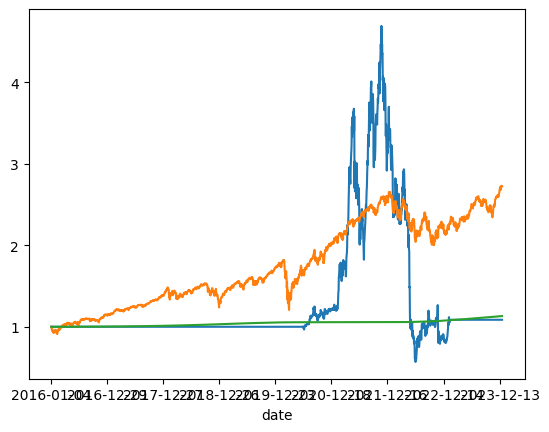

In [ ]:
# plot portfolio val and benchmarks
p.pf_values.plot()
(spy_returns + 1).cumprod().plot()
(tbill_returns + 1).cumprod().plot()

In [ ]:
# test performance measures
bm_returns = spy_returns
rf_returns = tbill_returns

for period in ["full", "active_period", "active_days"]:
    print(f"PERFORMANCE MEASURES for period: {period}")
    print(f"Sharpe Ratio: {p.get_sharpe_ratio(bm_returns=tbill_returns, period=period)}")
    print(f"Sortino Ratio: {p.get_sortino_ratio(bm_returns=tbill_returns, daily_target_return=0, period=period)}")
    print(f"Value at Risk (95%): {p.get_value_at_risk(alpha=0.05, period=period)}")
    print(f"Max Drawdown: {p.get_max_drawdown(period=period)}")
    print(f"Total Return: {p.get_total_return(period=period)}")
    print(f"Total Excess Return: {p.get_total_excess_return(bm_returns=spy_returns, period=period)}")
    print(f"Beta: {p.get_beta(bm_returns=spy_returns, period=period)}")
    print(f"{30*'-'}")

# for spy
print(f"PERFORMANCE MEASURES for SPY benchmark")
print(f"Sharpe Ratio: {pfu.sharpe_ratio(pf_returns=spy_returns, bm_returns=tbill_returns)}")
print(f"Sortino Ratio: {pfu.sortino_ratio(pf_returns=spy_returns, bm_returns=tbill_returns, daily_target_return=0)}")
print(f"Value at Risk (95%): {pfu.value_at_risk(pf_returns=spy_returns, alpha=0.05)}")
print(f"Max Drawdown: {pfu.max_drawdown(pf_values=(spy_returns + 1).cumprod())}")
print(f"Total Return: {pfu.total_return(pf_returns=spy_returns)}")
print(f"Total Excess Return: {pfu.total_excess_return(pf_returns=spy_returns, bm_returns=spy_returns)}")
print(f"Beta: {pfu.beta(pf_returns=spy_returns, bm_returns=spy_returns)}")
print(f"{30*'-'}")


PERFORMANCE MEASURES for period: full
Sharpe Ratio: 0.013110818291090441
Sortino Ratio: 0.017927870541186913
Value at Risk (95%): 0.036929924622854826
Max Drawdown: 0.8787502294598961
Total Return: 0.08592370665852811
Total Excess Return: -1.636634259434713
Beta: 0.5986099450712062
------------------------------
PERFORMANCE MEASURES for period: active_period
Sharpe Ratio: 0.026266589756820703
Sortino Ratio: 0.03888348872192538
Value at Risk (95%): 0.07533410735470643
Max Drawdown: 0.8787502294598961
Total Return: 0.08592370665852811
Total Excess Return: -0.2523245078320562
Beta: 1.7446246900980147
------------------------------
PERFORMANCE MEASURES for period: active_days
Sharpe Ratio: 0.026266589756820703
Sortino Ratio: 0.03888348872192538
Value at Risk (95%): 0.07533410735470643
Max Drawdown: 0.8787502294598961
Total Return: 0.08592370665852811
Total Excess Return: -0.2523245078320562
Beta: 1.7446246900980147
------------------------------
PERFORMANCE MEASURES for SPY benchmark
Sharp